In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
selected_stocks = ["AMZN","JPM","FCX","HAL","F"]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FCX
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: F

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMZN        0.4889
F           0.0320
FCX         0.0062
HAL         0.0160
JPM         0.4569
Return      0.2149
Sharpe      0.5804
Variance    0.2014
Name: 1383, dtype: float64


In [5]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: AMZN 	Portfolio Weight: 0.4889
                AMZN
Date                
2014-01-03 -0.001883
2014-01-06 -0.003478
2014-01-07  0.005435
2014-01-08  0.004755
2014-01-09 -0.001108

Ticker: F 	Portfolio Weight: 0.032
                   F
Date                
2014-01-03  0.000145
2014-01-06  0.000144
2014-01-07 -0.000413
2014-01-08  0.000331
2014-01-09  0.000612

Ticker: FCX 	Portfolio Weight: 0.0062
                 FCX
Date                
2014-01-03 -0.000051
2014-01-06 -0.000050
2014-01-07 -0.000061
2014-01-08 -0.000078
2014-01-09 -0.000084

Ticker: HAL 	Portfolio Weight: 0.016
                 HAL
Date                
2014-01-03  0.000038
2014-01-06  0.000061
2014-01-07 -0.000038
2014-01-08 -0.000225
2014-01-09  0.000036

Ticker: JPM 	Portfolio Weight: 0.4569
                 JPM
Date                
2014-01-03  0.003519
2014-01-06  0.002641
2014-01-07 -0.005297
2014-01-08  0.004289
2014-01-09 -0.000855

[Historic] Portfolio Performance:
                 AMZN         F       

In [6]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                AMZN         F       FCX       HAL       JPM      RTNp  \
Date                                                                     
2014-01-03 -0.001883  0.000145 -0.000051  0.000038  0.003519  0.001767   
2014-01-06 -0.003478  0.000144 -0.000050  0.000061  0.002641 -0.000683   
2014-01-07  0.005435 -0.000413 -0.000061 -0.000038 -0.005297 -0.000374   
2014-01-08  0.004755  0.000331 -0.000078 -0.000225  0.004289  0.009072   
2014-01-09 -0.001108  0.000612 -0.000084  0.000036 -0.000855 -0.001400   

                RTNm    Excess       Compare  
Date                                          
2014-01-03  0.005026 -0.003259  Underperform  
2014-01-06 -0.021439  0.020757    Outperform  
2014-01-07  0.005109 -0.005483  Underperform  
2014-01-08 -0.005897  0.014969    Outperform  
2014-01-09 -0.005932  0.004533    Outperform  


In [7]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess,Compare
Date,,,,,,,,,
2014-01-03,-0.001883,0.000145,-0.000051,0.000038,0.003519,0.001767,0.005026,-0.003259,Underperform
2014-01-06,-0.003478,0.000144,-0.000050,0.000061,0.002641,-0.000683,-0.021439,0.020757,Outperform
2014-01-07,0.005435,-0.000413,-0.000061,-0.000038,-0.005297,-0.000374,0.005109,-0.005483,Underperform
2014-01-08,0.004755,0.000331,-0.000078,-0.000225,0.004289,0.009072,-0.005897,0.014969,Outperform
2014-01-09,-0.001108,0.000612,-0.000084,0.000036,-0.000855,-0.001400,-0.005932,0.004533,Outperform


In [8]:
# [View] Evaluation Sample Size
pfolio_eval.count()

AMZN       1063
F          1063
FCX        1063
HAL        1063
JPM        1063
RTNp       1063
RTNm       1063
Excess     1063
Compare    1063
dtype: int64

In [9]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5146
Underperform    0.4854
Name: Compare, dtype: float64

In [10]:
pfolio_eval["RTNp"].head(10)

Date
2014-01-03    0.001767
2014-01-06   -0.000683
2014-01-07   -0.000374
2014-01-08    0.009072
2014-01-09   -0.001400
2014-01-10   -0.005374
2014-01-13   -0.014810
2014-01-14    0.009370
2014-01-15    0.012324
2014-01-16   -0.003753
Name: RTNp, dtype: float64

In [11]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

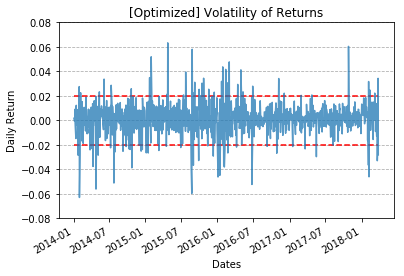

In [12]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

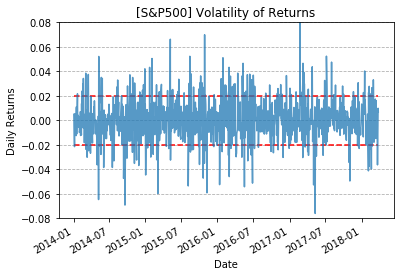

In [13]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [ ]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [ ]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [ ]:
rtn_df.head()

In [ ]:
rtn_df.iloc[0]["Date"].date()

In [ ]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [ ]:
mkt_val[:10]

In [ ]:
pfolio_eval.describe()